In [1]:
from deepface import DeepFace
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = "../server/static/imgs/employee-24.png"
img_folder_path = "../server/static/imgs"

# img1 = cv2.imread(img_path)
# plt.imshow(img1[:, :, ::-1])
# plt.show()



In [10]:
def get_imgs(img_name:str):
    img_folder_path = "../server/static/imgs"
    dfs = DeepFace.find(
        img_path=f"{img_folder_path}/{img_name}",
        db_path=img_folder_path,
        enforce_detection=False,
    )
    return list(dfs[0].identity.str.split('/').str[-1])

In [13]:
get_imgs("employee-1.png")

24-05-25 21:28:05 - ⚠️ Representations for images in ../server/static/imgs folder were previously stored in representations_vgg_face.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-05-25 21:28:05 - There are 4 representations found in representations_vgg_face.pkl
24-05-25 21:28:07 - find function lasts 1.7532010078430176 seconds


['employee-1.png', 'employee-2.png']

In [8]:
img1=cv2.imread("elon.jpeg")
img2=cv2.imread("celeb.jpg")

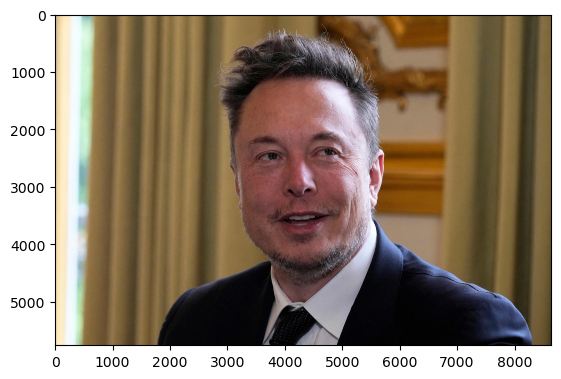

In [9]:
plt.imshow(img1[:,:,::-1])
plt.show()

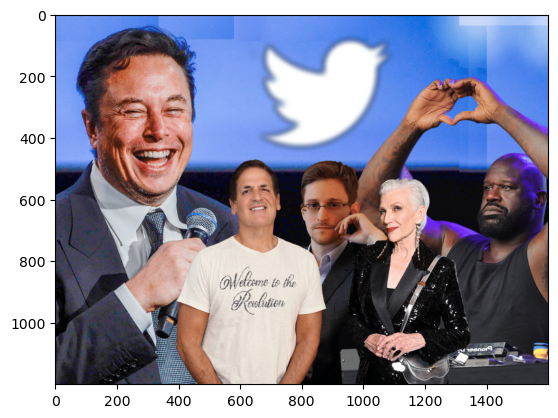

In [10]:
plt.imshow(img2[:,:,::-1])
plt.show()

In [11]:
#output_img=cv2.GaussianBlur(img2,(5,5),0)
#plt.imshow(output_img[:,:,::-1])
#plt.show()
#cv2.imshow("output",output_img)

In [12]:
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

In [13]:
result=DeepFace.verify(img1, img2, distance_metric = metrics[2],model_name = models[2],detector_backend = backends[4])
#objs = DeepFace.analyze(img1, 
 #       actions = ['age', 'gender', 'race', 'emotion'],
  #                      detector_backend = backends[4]
#)

In [15]:
print(result) 
print ()
print(result["verified"])
print()
#print(result["model_accuracy"])
#print(objs)
print()
#print(objs[0]["dominant_race"])

{'verified': True, 'distance': 0.5485107409064562, 'threshold': 1.04, 'model': 'Facenet512', 'detector_backend': 'retinaface', 'similarity_metric': 'euclidean_l2', 'facial_areas': {'img1': {'x': 3174, 'y': 1191, 'w': 2300, 'h': 3202}, 'img2': {'x': 143, 'y': 132, 'w': 303, 'h': 453}}, 'time': 27.7}

True




In [16]:
def direct_compare(image1, image2):
    #Metric, model and detector are changable. They are global variables
    if img1 is None or img2 is None:
      print("Error: Could not read images!")
      return
    result=DeepFace.verify(image1, image2, distance_metric = metrics[2],model_name = models[2],detector_backend = backends[4])
    return result["verified"]

In [17]:
import os
def multi_compare(image, path):
    images_array = []
    for filename in os.listdir(path):
        img_path = os.path.join(data, filename)
        img = Image.open(img_path)
        img_array = np.array(img)  # Convert to NumPy array
        images_array.append(img_array)

    images_array = np.array(images_array)
    suspects=[]
    for image1 in images_array:
        result=DeepFace.verify(image, image1, distance_metric = metrics[2],model_name = models[2],detector_backend = backends[4])
        if result["verified"]==True:
            suspects.append(image)

    return suspects